# Celestial Coordinates and Timekeeping

## Authors
B.W. Holwerda

## Learning Goals
* coordinate systems
* time (julian date)
* Right ascension and declination
* Galactic, equatorial.
* Epochs

## Keywords

## Companion Content
Chapter 1 in Ryden & Peterson

## Summary

<hr>

https://docs.astropy.org/en/stable/coordinates/index.html

https://python4astronomers.github.io/astropy/coordinates.html

https://astropy4cambridge.readthedocs.io/en/latest/_static/Astropy%20-%20Celestial%20Coordinates.html


## Student Name and ID:



## Date:

<hr>

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15

from astropy.coordinates import SkyCoord
from astropy import units as u


## Spherical Coordinates

To mark your position on a sphere, one could opt for a circumference (i.e. the intersection with a plane) and two poles. This happens naturally if there is an *orbit* which defines a plane or a rotation which defines an axis and therefore two poles.

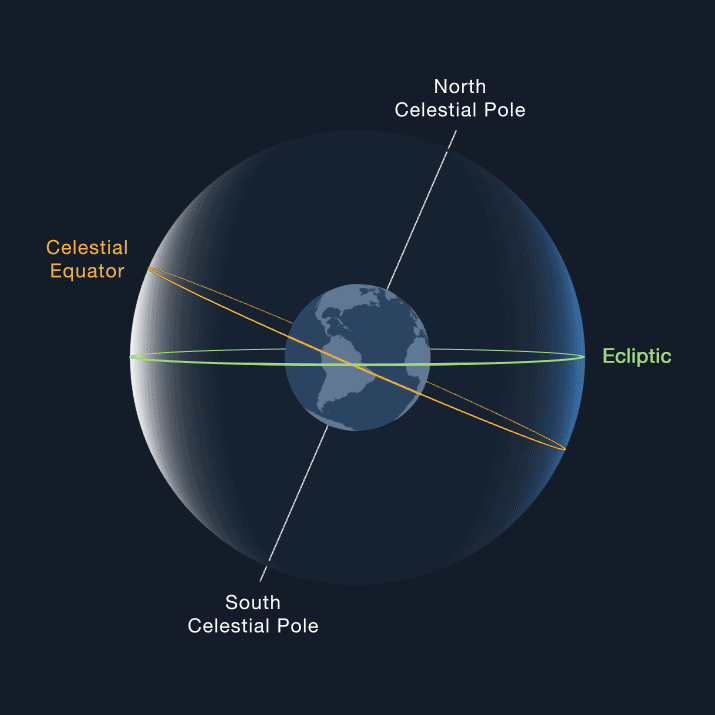

from https://solarsystem.nasa.gov/basics/chapter2-2/

shows how the rotation of the earth defines a coordinate system on the sphere of the night sky. This coordinate system has an equator and a North and South pole. The terms longitude (along the equator) and lattitude (above or below the equator) also apply. Pick a spot as 0,0 (for example the Greenich meridian) and you have a coordinate system to refer to positions on the sphere of the sky. These are the celestial coordiantes that astronomers use a lot to designate where things are on the sky.

Alternatively, one could use the plane of Earth's orbit, the ecliptic. Now the plane is defined by the orbits of the planets and the poles by the rotation of the solar system. This can be much more intuitive to talk about when talking about solar system objects. 

There is another! One could take the orbit of our whole solar system around the Galactic center as the coordinate system. The zeropoint is now the center of the Milky Way with a "north" and "south" picked. This makes much more sense when talking about objects belonging to the Milky Way.

So depending on the topic, astronomy and planetary sciences use different reference frames for the positions of objects on a sphere. And we need to translate between them! 

So much so, that astropy has a special package to tranlate between them.

## Right Ascension and Declination

The image below shows how objects in the sky are assigned a right ascension (RA) and declination (DEC). The zeropoint is the point on the sky where the Sun is during the Vernal (spring) Equinox. 

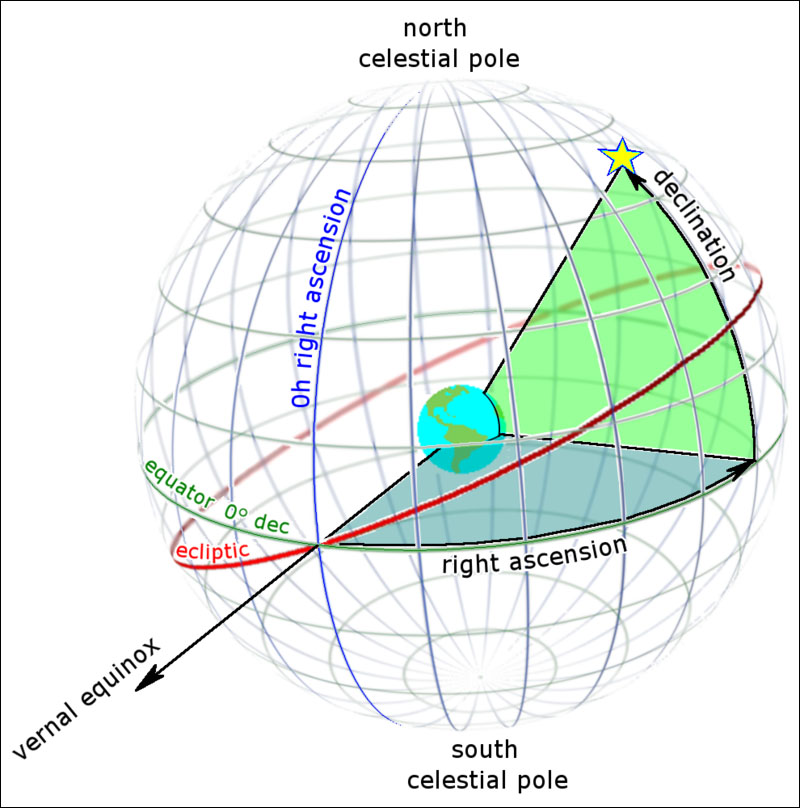

from: https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/

The ecliptic (the plane defined where the planets are orbiting in) is shown with it's angle with respect to the equator. Remember that our earth's rotation and it's orbit are not aligned! 

### Assignment 1

Let's start with a completely random position on the sky. The module SkyCoord can generate a position for us where we define the RA and DEC in degrees. What are the maximum and minimum values you can put in there? Can RA be negative? Can DEC be negative? Can DEC be greater than 90 degrees?

In [59]:
# try out different values for RA & DEC
c = SkyCoord(ra=-10.68458 * u.deg, dec=41.26917 * u.deg)
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (349.31542, 41.26917)>


*student answer here*

### Assignment 2

There are *two* ways we can denote RA. Since these correspond to the positions on the sphere changing with rotation, we can think of them as hours, minutes and seconds. 

So RA can be expressed in degrees (0-360) or in hours:minutes:seconds (0-24 hours : 0-60 minutes : 0-60 seconds). In line with expressing this in hours, the declination can then be expressed as degrees, each degree split in 60 minutes and each minute into 60 seconds. 

This is the hexa-decimal way of talking about angles (thank you Babylonians) and quite common way to express the angles for RA and DEC. The example below shows the same coordinates in a string with hour-minute-seconds for the RA and degrees-minutes-seconds for the declination. 

what do you notice about the coordinates when you print this position on the sky? how does SkyCoord express them?

There is a trick to asking sky coordinates in either system. Suppose I called my position bob, I can for bob.ra or bob.ra.deg. Is there a difference on what is returned? 

In [13]:
# student practice below
ch = SkyCoord('00h42m44.3s +41d16m9s')
print(ch)
print(ch.ra.deg)
print(ch.ra.hms)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68458333, 41.26916667)>
10.684583333333332
hms_tuple(h=0.0, m=42.0, s=44.30000000000021)


### Assignment 3

The neat thing about SkyCoord is that we can interrogate the instance and ask for components specifically. For example we can ask for just the RA value. And for the RA value in h:m:s or in degrees or in radians. 

In [1]:
# student work here
# coordinate RA in h:m:s

In [3]:
# student work here
# coordinate RA hour value


In [4]:
# student work here
# coordinate DEC value in radian



### Assignment 4 -  Well-known Objects

There are many catalogs of objects in the sky, discovered and especially catalogued for later use. For non-star, binocular/small telescope objects, the Messier catalog is a great place to start. Pick a number from 1 to 101 and get the coordinates from its name.
Make sure to google the name "Messier X" and identify what kind of object it is.

In [16]:
# Student work below
m33 = SkyCoord.from_name("M33") # motify to get a different Messier catalog entry
print(m33)

<SkyCoord (ICRS): (ra, dec) in deg
    (23.46206906, 30.66017511)>


*what kind of object is your Messier catalog choice?*

## An Observer's view

Now we move our perspective from outside onto the earth to a place on Earth, our observing site. There is a horizon and we look up. These correspond to the movements a telescope needs to make and they are also in angles. 

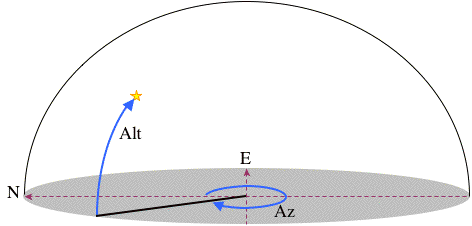

We can think of this as the coordinate frame for *this exact location*. Straight up is *zenith*. On the horizon due North is our 0,0 coordinate. *Zenith* is 90 degrees *Altitude* and due South is 180 degrees *Azimuth*. So if we have the position in RA and DEC and the time, we can compute what these angles should be for a specific place on earth. 

### Assignment 5 -- Can you see your Messier Object?

Using the above coordinates, we are going to check if we can see your Messier object at a few observatories. If you know the location (GPS) of your observatory, you can define them. A list of the major ones are available too. Modify the example below and see if your Messier object is above the horizon at Bear Mountain and at Moore's Observatory tonight at 11pm? Note time takes dates as year-month-day and hours in military time. How about later in the night?

In [45]:
from astropy.coordinates import AltAz, EarthLocation, SkyCoord, get_body, get_sun
from astropy.time import Time
from astropy.visualization import quantity_support

bear_mountain = EarthLocation(lat=41.3 * u.deg, lon=-74 * u.deg, height=390 * u.m)
moore = EarthLocation(lat=38.34468287118605*u.deg, lon=-85.52902506229918*u.deg, height=650*u.m)

# 38°20'41.2"N 85°31'42.6"W
utcoffset = -4 * u.hour  # EDT
time = Time("2025-7-7 23:00:00") - utcoffset

m33altaz = m33.transform_to(AltAz(obstime=time, location=bear_mountain))
print(f"M33's Altitude = {m33altaz.alt:.2}")

m33altaz = m33.transform_to(AltAz(obstime=time, location=moore))
print(f"M33's Altitude = {m33altaz.alt:.2}")

M33's Altitude = -2.6 deg
M33's Altitude = 6.2e+01 deg


*student answer, can your Messier Object be observed at either observatory tonight?*

### Assignment 6 -- Observatories

Below is a built-in function that lets you peruse all the observatories in astropy. Have you heard of any of them? Are they all in the United States or are they world-wide? 

In [41]:
allsitenames = EarthLocation.get_site_names() 
print(allsitenames)


['ALMA', 'AO', 'ARCA', 'ASKAP', 'ATA', 'ATST', 'Allen Telescope Array', 'Anderson Mesa', 'Anglo-Australian Observatory', 'Apache Point', 'Apache Point Observatory', 'Arecibo', 'Arecibo Observatory', 'Astroparticle Research with Cosmics in the Abyss', 'Atacama Large Millimeter Array', 'Australian Square Kilometre Array Pathfinder', 'BAO', 'BBSO', 'Beijing XingLong Observatory', 'Big Bear Solar Observatory', 'Black Moshannon Observatory', 'CAHA', 'CAHA', 'CHARA', 'CHIME', 'Canada-France-Hawaii Telescope', 'Canadian Hydrogen Intensity Mapping Experiment', 'Catalina Observatory', 'Catalina Observatory: 61 inch telescope', 'Centro Astronomico Hispano-Aleman, Almeria', 'Cerro Armazones Observatory', 'Cerro Pachon', 'Cerro Paranal', 'Cerro Tololo', 'Cerro Tololo Interamerican Observatory', 'Cima Ekar 182 cm Telescope', 'Cima Ekar Observing Station', 'Ckoirama', 'Ckoirama Observatory', 'DCT', 'DKIST', 'DRAO', 'DRAO 26m Telescope', 'Daniel K. Inouye Solar Telescope', 'Discovery Channel Telescop

*student written answer here*

### Assignment 7 -- Pick an observatory by name

Pick one of the observatories by name in the above list and change the example below to get its position. Can this observatory pick out your favorite Messier object? Can you think why or why not?

In [49]:
#student work below
alma = EarthLocation.of_site('ALMA')
print(alma.geodetic)

m33altaz = m33.transform_to(AltAz(obstime=time, location=alma))
print(f"M33's Altitude = {m33altaz.alt:.2}")

GeodeticLocation(lon=<Longitude -67.755 deg>, lat=<Latitude -23.029 deg>, height=<Quantity 5000. m>)
M33's Altitude = -3.7e+01 deg


*student written answer here*

### Assignment 8 -- Time.

Not only do we need to know where an object is on the sky but also when we are looking. Universal Time Coordinates (UTC) is used for time calibration in astronomy and aviation etc. We could ask for it's position every hour or so to see if we have enough time to take our observations but there is an easier way. The linspace command gives equally spaced numbers between the first and second value for as many as specified in the third value linspace(start, stop, number of points). 

Let's look at the 6 hours before and after midnight. So instead of a single time, we give it a list of times. What is now passed on to the altaz position of the Messier object?

In [73]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz


m33 = SkyCoord.from_name('M33')  
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
moore = EarthLocation(lat=38.34468287118605*u.deg, lon=-85.52902506229918*u.deg, height=650*u.m)

# 38.34468287118605, -85.52902506229918
utcoffset = -4 * u.hour  # Eastern Daylight Time

midnight = Time('2012-7-13 00:00:00') - utcoffset

delta_midnight = np.linspace(-6, 6, 100) * u.hour

m33altaz = m33.transform_to(AltAz(obstime=midnight+delta_midnight,location=bear_mountain))

m33altaz.alt.deg, m33altaz.az.deg




(array([-16.39241056, -16.72134091, -17.01292705, -17.26670764,
        -17.48227522, -17.65927924, -17.79742875, -17.89649474,
        -17.95631189, -17.97677997, -17.95786459, -17.89959754,
        -17.80207648, -17.66546418, -17.48998719, -17.27593405,
        -17.02365303, -16.73354941, -16.40608246, -16.04176205,
        -15.64114502, -15.20483132, -14.73346004, -14.2277053 ,
        -13.68827216, -13.11589249, -12.51132093, -11.87533097,
        -11.2087111 , -10.51226123,  -9.78678919,  -9.03310756,
         -8.25203062,  -7.44437161,  -6.61094019,  -5.75254018,
         -4.86996751,  -3.96400842,  -3.03543786,  -2.08501814,
         -1.11349777,  -0.12161052,   0.88992541,   1.92040796,
          2.96915169,   4.03548812,   5.11876586,   6.21835076,
          7.33362581,   8.46399106,   9.60886338,  10.76767619,
         11.9398791 ,  13.12493747,  14.32233199,  15.53155812,
         16.75212555,  17.98355755,  19.22539041,  20.47717267,
         21.73846448,  23.00883677,  24.

*student written answer here*

### Assignment 9 -- Plotting Altitude of your object 

For three observatories, Bear, Moore and the third one you picked in assignment 7, plot the altitude of your Messier object as a function of time. Modify the example below.

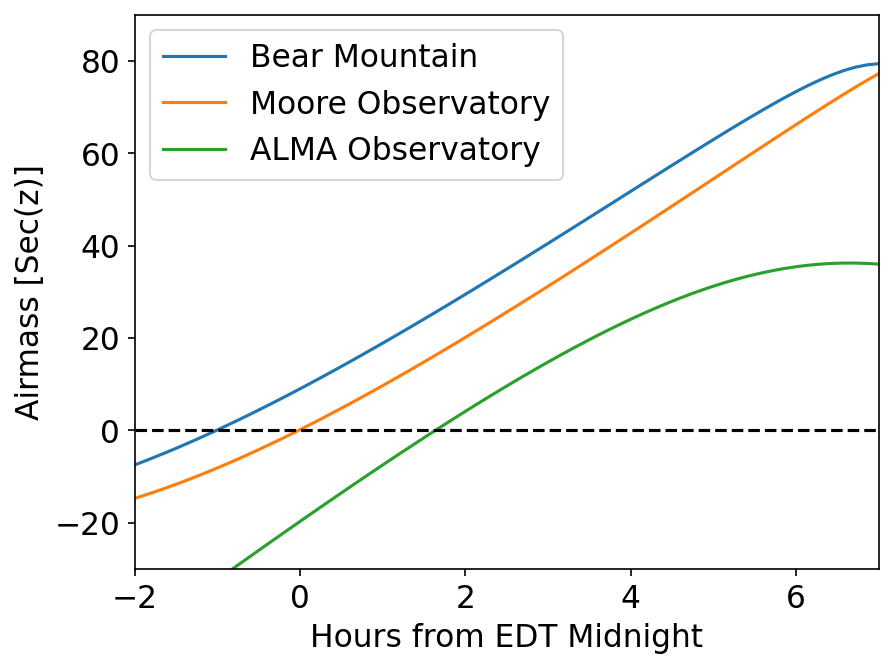

In [71]:
m33altazs_bear = m33.transform_to(AltAz(obstime=midnight+delta_midnight, location=bear_mountain))  
m33altazs_moore = m33.transform_to(AltAz(obstime=midnight+delta_midnight, location=moore))  
m33altazs_alma = m33.transform_to(AltAz(obstime=midnight+delta_midnight, location=alma))  

plt.plot(delta_midnight, m33altazs_bear.alt.deg, label='Bear Mountain')  
plt.plot(delta_midnight, m33altazs_moore.alt.deg, label='Moore Observatory')  
plt.plot(delta_midnight, m33altazs_alma.alt.deg, label='ALMA Observatory')  

plt.xlim(-2, 7)  
plt.ylim(-30, 90)  
plt.axhline(0, color='k', ls='dashed')
plt.xlabel('Hours from EDT Midnight')  
plt.ylabel('Airmass [Sec(z)]')  
plt.legend()
plt.show()

### Assignment 10 -- Synthesis.

When planning observations, it helps to know where both your target objects in the sky are and where and when your observatory is. 
When an object goes through zenith, it suffers the least from the atmospheric effects. When is that for you Messier Object for each of the three observatories?


*student written answer here*

<hr>